# 3. LOFI Explanations 
We run a grid search over all hyperparameters to get a broad sense of instructive explanation performance.

In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
modelstr = "vit_iid"

In [43]:
import utils
from embed_patches import class_tfidf
from embed_patches import diff_exp
from embed_patches import generate_model_outputs
from embed_patches import eval_classifier

if modelstr == "tile2vec":
    Zs_path_train = "/home/data/tinycam/train/Zs"
    Zs_path_test = "/home/data/tinycam/test/clean_Zs"
    embed_path = "/home/lofi/lofi/src/outputs_tile2vec/train_sampled_inference_z_embeds.obj"
    crop_dict = utils.deserialize("/home/lofi/lofi/src/outputs_tile2vec/test_crop_coords.obj")
elif modelstr == "vit_iid":
    Zs_path_train = "/home/data/tinycam/train/Zs_vit"
    Zs_path_test = "/home/data/tinycam/test/clean_Zs_vit"
    embed_path = "/home/lofi/lofi/src/outputs_vit_iid/train_vit_iid_sampled_inference_z_embeds.obj"
    mapping_path = "/home/lofi/lofi/src/outputs_vit_iid/train_vit_iid_chunkid_position.obj" # needed to use memmap
    crop_dict = utils.deserialize("/home/lofi/lofi/src/outputs_vit_iid/test_vit_iid_crop_coords.obj")
elif modelstr == "clip":
    Zs_path_train = "/home/data/tinycam/train/Zs_clip"
    Zs_path_test = "/home/data/tinycam/test/clean_Zs_clip"
    embed_path = "/home/lofi/lofi/src/outputs_clip/train_clip_sampled_inference_z_embeds.obj"
    crop_dict = utils.deserialize("/home/lofi/lofi/src/outputs_clip/test_clip_crop_coords.obj")
elif modelstr == "plip":
    Zs_path_train = "/home/data/tinycam/train/Zs_plip"
    Zs_path_test = "/home/data/tinycam/test/clean_Zs_plip"
    embed_path = "/home/lofi/lofi/src/outputs_plip/train_plip_sampled_inference_z_embeds.obj"
    crop_dict = utils.deserialize("/home/lofi/lofi/src/outputs_plip/test_plip_crop_coords.obj")

label_dict_path_train = "/home/lofi/lofi/src/outputs/train-cam-cam16-224-background-labeldict.obj"
label_dict_path_test = "/home/lofi/lofi/src/outputs/test-cam-cam16-224-background-labeldict.obj"

gts_path = "/home/data/tinycam/test/gt_masks"
csv_save_path = "/home/data/tinycam/test/csv_outputs"
label_dict_train = utils.deserialize(label_dict_path_train)
label_dict_test = utils.deserialize(label_dict_path_test)

Run the grid search

In [44]:
from embed_patches import run_lofi_gridsearch
# if modelstr == "vit_iid":
#     run_lofi_gridsearch(modelstr, embed_path, "cpu", Zs_path_train, Zs_path_test, label_dict_path_train, label_dict_path_test, crop_dict, csv_save_path, gts_path, mode="memmap", mapping_path=mapping_path)
# else:
#     run_lofi_gridsearch(modelstr, embed_path, "cpu", Zs_path_train, Zs_path_test, label_dict_path_train, label_dict_path_test, crop_dict, csv_save_path, gts_path)

# Analyze Single Encoders

In [45]:
# results_tile2vec = "/home/lofi/lofi/src/outputs_tile2vec/tile2vec_all_results_lofi.obj"
# tile2vec_results = utils.deserialize(results_tile2vec)
# tile2vec_results["K10-r0-elastic"].keys()
# import os
# os.path.getsize(results_tile2vec)

In [46]:
# results_clip = "/home/lofi/lofi/src/outputs_clip/clip_all_results_lofi.obj"
# clip_results = utils.deserialize(results_clip)

In [47]:
# clip_results["K20-r8-DEtok-a10000000000.0-t2"].keys()

## PLIP, CLIP, ChunkViT: eval probability or attention maps

In [48]:
# from embed_patches import eval_pcms

# gts_path = "/home/data/tinycam/test/gt_masks"
# label_dict = label_dict_test

# if modelstr == "vit_iid":
#     pcms_path = "/home/data/tinycam/test/probs_vit_iid"
#     other_results_vit_pcm = eval_pcms(pcms_path, gts_path, label_dict)
#     attn_path = "/home/data/tinycam/test/attn_vit_iid"
#     other_results_vit_sam = eval_pcms(attn_path, gts_path, label_dict, mode="attn")
# elif modelstr == "clip":
#     pcms_path = "/home/data/tinycam/test/probs_clip"
#     other_results_clip_pcm = eval_pcms(pcms_path, gts_path, label_dict)
# elif modelstr == "plip":
#     pcms_path = "/home/data/tinycam/test/probs_plip"
#     other_results_plip_pcm = eval_pcms(pcms_path, gts_path, label_dict)


## Now, plot LOFI grid-search!

We can now extract the relevant statistics and plot them

In [50]:
if modelstr == "tile2vec":
    all_results = utils.deserialize("/home/lofi/lofi/src/outputs_tile2vec/tile2vec_all_results_lofi.obj")
    elastic = utils.deserialize("/home/lofi/lofi/src/outputs_tile2vec/tile2vec_elastic_dict.obj")
elif modelstr == "vit_iid":
    all_results = utils.deserialize("/home/lofi/lofi/src/outputs_vit_iid/vit_iid_all_results_lofi.obj")
    elastic = utils.deserialize("/home/lofi/lofi/src/outputs_vit_iid/vit_iid_elastic_dict.obj")
elif modelstr == "clip":
    all_results = utils.deserialize("/home/lofi/lofi/src/outputs_clip/clip_all_results_lofi.obj")
    elastic = utils.deserialize("/home/lofi/lofi/src/outputs_clip/clip_elastic_dict.obj")
elif modelstr == "plip":
    all_results = utils.deserialize("/home/lofi/lofi/src/outputs_plip/plip_all_results_lofi.obj")
    elastic = utils.deserialize("/home/lofi/lofi/src/outputs_plip/plip_elastic_dict.obj")

In [51]:
from embed_patches import grab_stats_multithresh
results_df = grab_stats_multithresh(all_results, elastic)
results_df.head()

,K,r,model_class,a,t,auroc,auprc,prec,bacc
0,10,0,elastic,NaN,NaN,0.544643,0.650633,0.092872,0.5
1,10,0,DEtok,0.010,0.0,0.601658,0.681172,0.116282,0.5
2,10,0,DEtok,0.010,1.0,0.500000,0.689922,0.000000,0.5
3,10,0,DEtok,0.010,2.0,0.500000,0.689922,0.000000,0.5
4,10,0,DEtok,0.025,0.0,0.601658,0.681172,0.116282,0.5


In [52]:
elastic_df = results_df.loc[results_df['model_class'] == "elastic"]
detok_df = results_df.loc[results_df['model_class'] == "DEtok"]

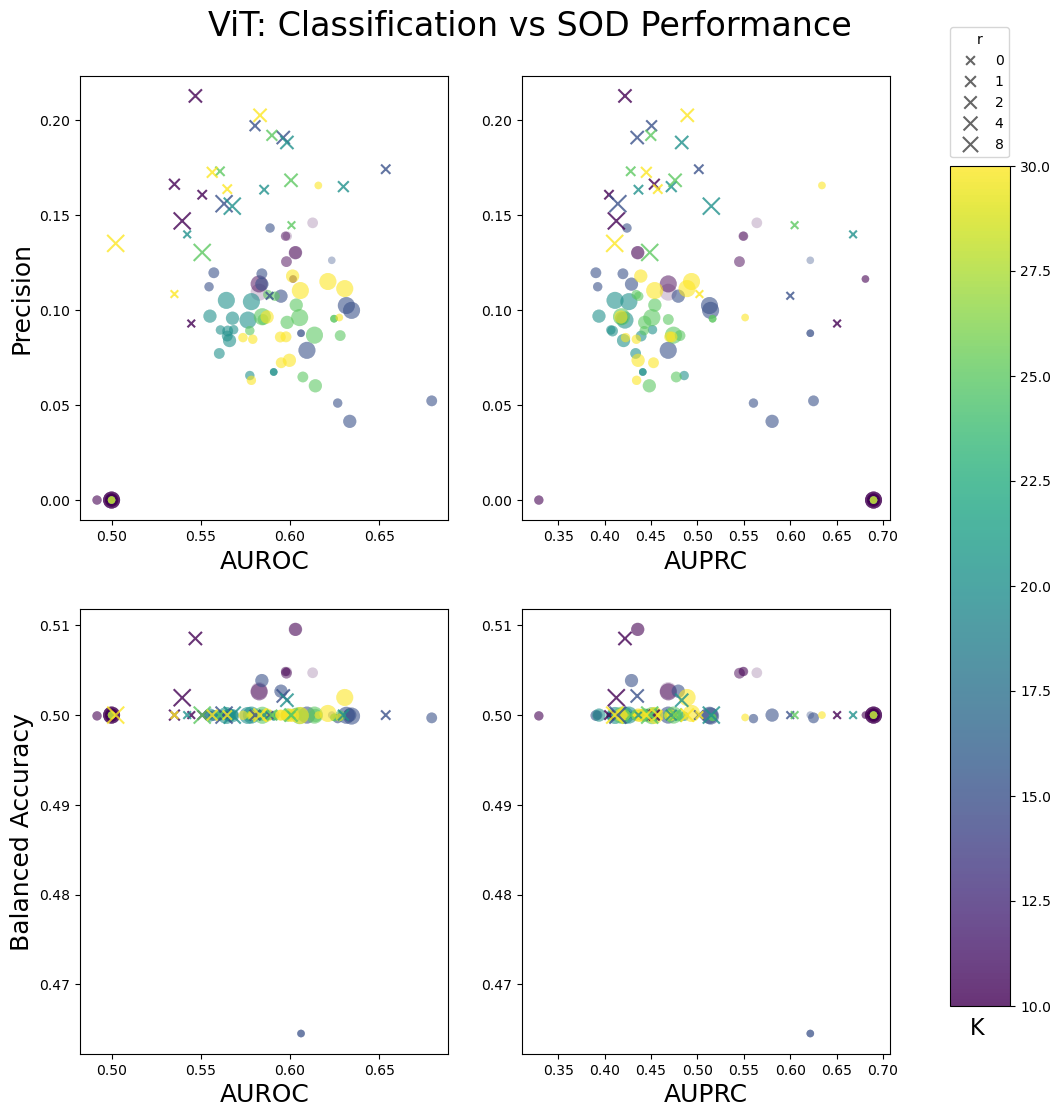

In [53]:
from embed_patches import plot_gridsearch_encoder_fg
plot_gridsearch_encoder_fg(detok_df, elastic_df, None, "ViT")

Now let's get the pareto optimal models given those 4 stats and also take the top models per stat. 

In [17]:
from embed_patches import get_top_models_encoder
top_models_dict = get_top_models_encoder(results_df)

we have 12 top models
we have 6 paretto models


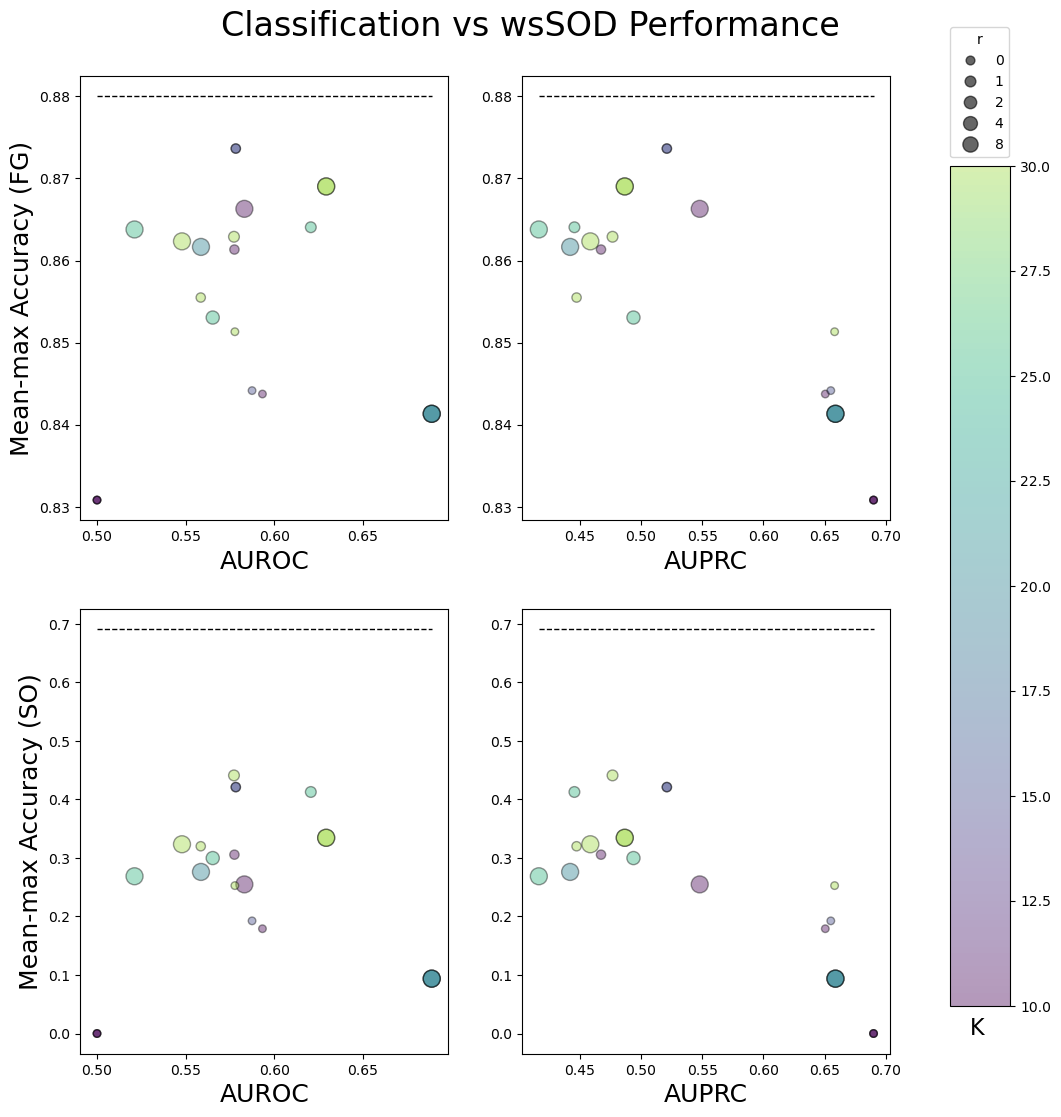

In [38]:
from embed_patches import plot_top_explainers
plot_top_explainers([top_models_dict], ["plip"], other_results)

we have 12 top models
we have 6 paretto models
we have 12 top models
we have 10 paretto models


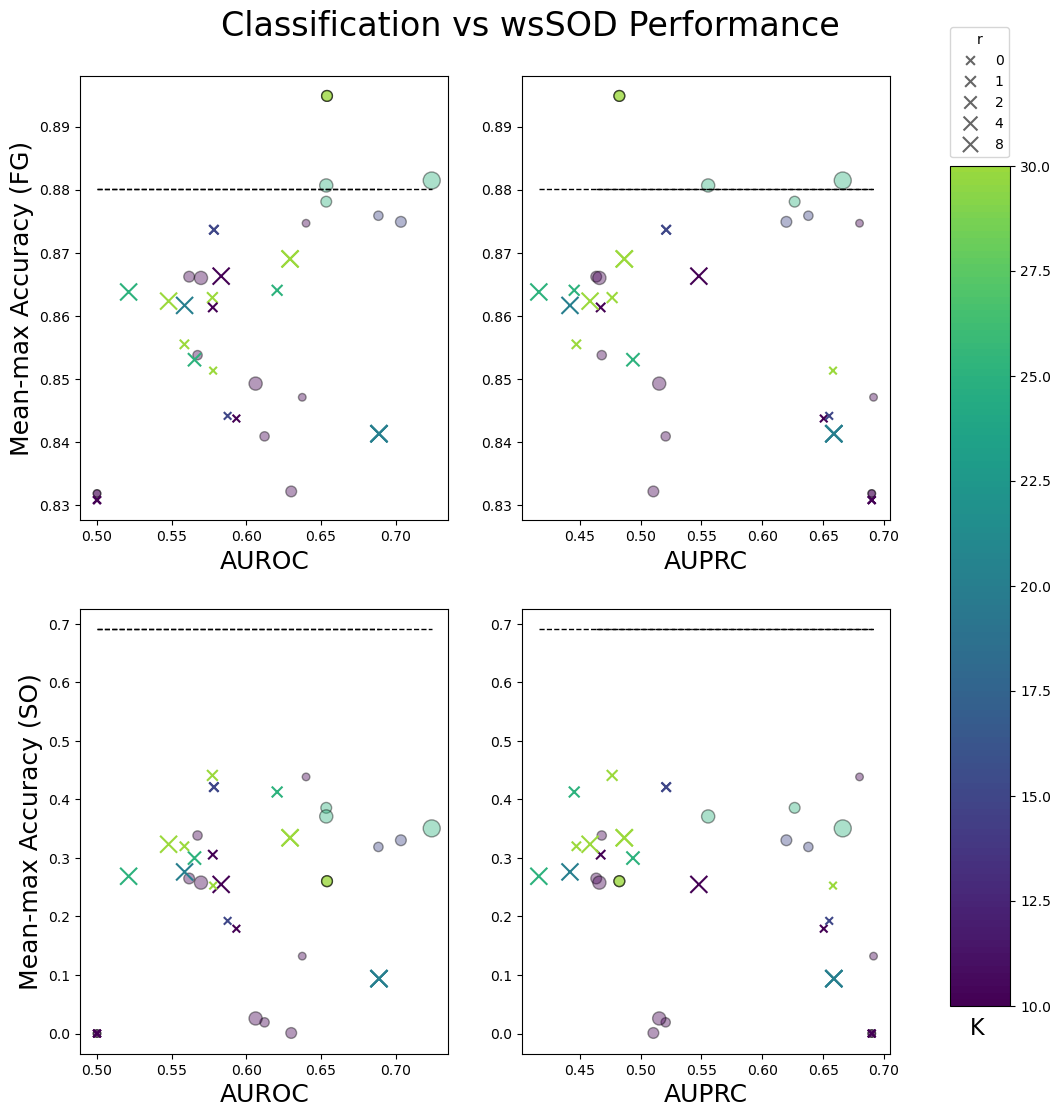

In [31]:
modelstr_list = ["plip", "tile2vec"]
top_models_dict_list = []

for modelstr in modelstr_list:
    if modelstr == "tile2vec":
        all_results = utils.deserialize("/home/lofi/lofi/src/outputs/all_results_lofi.obj")
        elastic = utils.deserialize("/home/lofi/lofi/src/outputs/elastic_dict.obj")
    elif modelstr == "plip":
        all_results = utils.deserialize("/home/lofi/lofi/src/outputs_plip/plip_all_results_lofi.obj")
        elastic = utils.deserialize("/home/lofi/lofi/src/outputs_plip/plip_elastic_dict.obj")

    results_df = grab_stats(all_results, elastic)
    top_models_dict = get_top_models_encoder(results_df)
    top_models_dict_list.append(top_models_dict)

plot_top_explainers(top_models_dict_list, modelstr_list)